# **Mushrooms Classifier Evaluation**

In this notebook, we evaluate multiple classifiers on a given dataset. The steps include:
- Preprocessing the data.
- Training and evaluating different classifiers.
- Using evaluation metrics such as classification reports and confusion matrices.
- Cross-validation on our models and comparison between them.

### **1. Data preprocessing**
We begin by loading the dataset and performing preprocessing steps to prepare it for training and evaluation.


In [1]:
from src.utils.preprocessing import preprocess_data

# Get the processed data
print("Preprocessing data...\n")
X_train, X_test, y_train, y_test = preprocess_data("data/mushroom_cleaned.csv")
print("Data preprocessing completed.\n")

Preprocessing data...

Data preprocessing completed.



### **2. Decision Tree Classifier**
A decision tree classifier is trained on the training dataset, and evaluated using test data.


Criterion: gini, Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Min Weight Fraction Leaf: 0, Accuracy: 0.9754960317460317
Criterion: gini, Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Min Weight Fraction Leaf: 0.1, Accuracy: 0.6337301587301587
Criterion: gini, Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Min Weight Fraction Leaf: 0.2, Accuracy: 0.6219246031746032
Criterion: gini, Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Min Weight Fraction Leaf: 0, Accuracy: 0.9728174603174603
Criterion: gini, Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Min Weight Fraction Leaf: 0.1, Accuracy: 0.6337301587301587
Criterion: gini, Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Min Weight Fraction Leaf: 0.2, Accuracy: 0.6219246031746032
Criterion: gini, Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 4, Min Weight Fraction Leaf: 0, Accuracy: 0.9741071428571428
Criterion: gini, Max Depth: None, Min Samples S

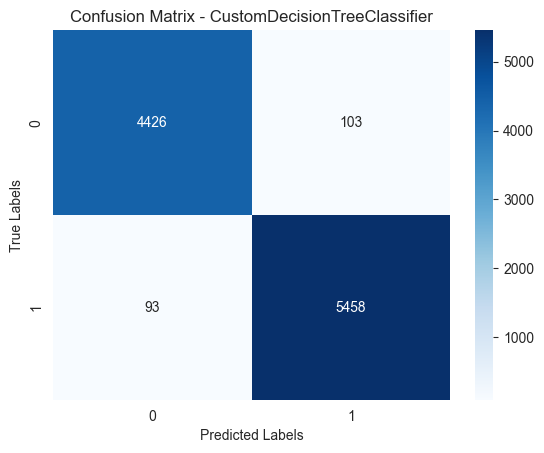


Starting 5-Fold cross-validation...
Fold 1: Accuracy = 0.9776
Fold 2: Accuracy = 0.9720
Fold 3: Accuracy = 0.9807
Fold 4: Accuracy = 0.9747
Fold 5: Accuracy = 0.9758

Cross-Validation completed.
Mean Accuracy: 0.9761


In [2]:
from src.classifiers.decisionTreeClassifier import CustomDecisionTreeClassifier
from src.utils.evaluation import cross_validate_kfold, evaluate

# Decision Tree Classifier
custom_tree = CustomDecisionTreeClassifier(verbose=1) # or verbose = 0
custom_tree.train_and_evaluate(X_train, y_train, X_test, y_test)

# Evaluation of the model
evaluate(custom_tree, X_test, y_test)

# Perform K-Fold cross-validation with 5 folds
mean_accuracies_custom_tree = cross_validate_kfold(custom_tree, X_train, y_train, n_splits=5)

# Stock all  mean accuracies
mean_accuracies = [mean_accuracies_custom_tree]

### **3. Most Common Class Classifier**
This baseline classifier predicts the most common class in the training dataset for all test samples. It provides a reference for evaluating more complex models.



Evaluating model on the test set...

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4529
           1       0.55      1.00      0.71      5551

    accuracy                           0.55     10080
   macro avg       0.28      0.50      0.36     10080
weighted avg       0.30      0.55      0.39     10080



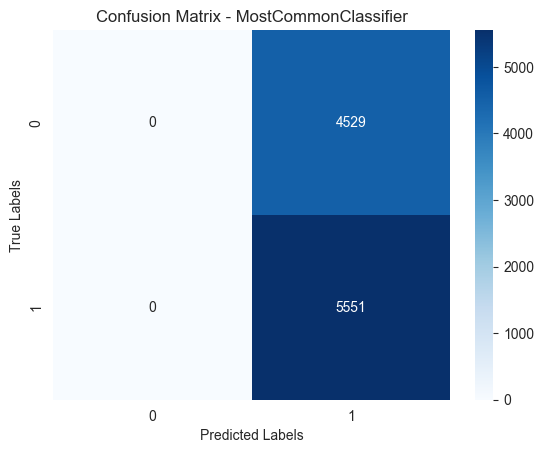


Starting 5-Fold cross-validation...
Fold 1: Accuracy = 0.5444
Fold 2: Accuracy = 0.5511
Fold 3: Accuracy = 0.5575
Fold 4: Accuracy = 0.5495
Fold 5: Accuracy = 0.5508

Cross-Validation completed.
Mean Accuracy: 0.5507


In [3]:
from src.classifiers.mostCommonClass import MostCommonClassifier

# Most Common Class Classifier
most_common_clf = MostCommonClassifier()
most_common_clf.fit(X_train, y_train)

# Evaluation of the model
evaluate(most_common_clf, X_test, y_test)

# Perform K-Fold cross-validation with 5 folds
mean_accuracies_most_common_clf = cross_validate_kfold(most_common_clf, X_train, y_train, n_splits=5)

# Stock all accuracies
mean_accuracies.append(mean_accuracies_most_common_clf)

### **4. Linear Regression Classifier**
A linear regression-based classifier is tested to compare its performance with other methods.


Alpha: 0.01, Accuracy: 0.6475198412698413
Alpha: 0.1, Accuracy: 0.6475198412698413
Alpha: 1.0, Accuracy: 0.6475198412698413
Alpha: 10.0, Accuracy: 0.6475198412698413
Alpha: 100.0, Accuracy: 0.647420634920635

Best hyperparameter found:
Alpha: 0.01, Accuracy: 0.6475198412698413

Evaluating model on the test set...

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58      4529
           1       0.66      0.73      0.69      5551

    accuracy                           0.65     10080
   macro avg       0.64      0.64      0.64     10080
weighted avg       0.65      0.65      0.64     10080



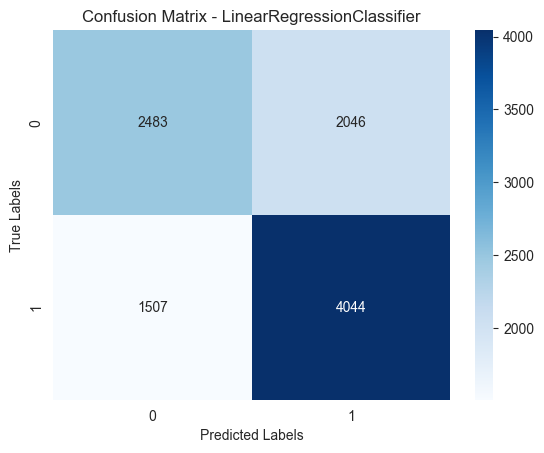


Starting 5-Fold cross-validation...
Fold 1: Accuracy = 0.6488
Fold 2: Accuracy = 0.6463
Fold 3: Accuracy = 0.6561
Fold 4: Accuracy = 0.6542
Fold 5: Accuracy = 0.6450

Cross-Validation completed.
Mean Accuracy: 0.6501


In [4]:
from src.classifiers.LinearRegression_classifier import LinearRegressionClassifier

# Linear Regression Classifier
linear_regression = LinearRegressionClassifier()
linear_regression.train_and_evaluate(X_train, y_train, X_test, y_test)

# Evaluation of the model
evaluate(linear_regression, X_test, y_test)

# Perform K-Fold cross-validation with 5 folds
mean_accuracies_linear_regression = cross_validate_kfold(linear_regression, X_train, y_train, n_splits=5)

# Stock all accuracies
mean_accuracies.append(mean_accuracies_linear_regression)

### **5. Perceptron Classifier**
Here we test a perceptron-based classifier, which is a simple linear binary classifier.


eta0: 0.0001, Alpha: 1e-05, Accuracy: 0.5657738095238095
eta0: 0.0001, Alpha: 0.0001, Accuracy: 0.5657738095238095
eta0: 0.0001, Alpha: 0.001, Accuracy: 0.5657738095238095
eta0: 0.0001, Alpha: 0.01, Accuracy: 0.5657738095238095
eta0: 0.0001, Alpha: 0.1, Accuracy: 0.5657738095238095
eta0: 0.0001, Alpha: 1.0, Accuracy: 0.5657738095238095
eta0: 0.001, Alpha: 1e-05, Accuracy: 0.5657738095238095
eta0: 0.001, Alpha: 0.0001, Accuracy: 0.5657738095238095
eta0: 0.001, Alpha: 0.001, Accuracy: 0.5657738095238095
eta0: 0.001, Alpha: 0.01, Accuracy: 0.5657738095238095
eta0: 0.001, Alpha: 0.1, Accuracy: 0.5657738095238095
eta0: 0.001, Alpha: 1.0, Accuracy: 0.5657738095238095
eta0: 0.01, Alpha: 1e-05, Accuracy: 0.5657738095238095
eta0: 0.01, Alpha: 0.0001, Accuracy: 0.5657738095238095
eta0: 0.01, Alpha: 0.001, Accuracy: 0.5657738095238095
eta0: 0.01, Alpha: 0.01, Accuracy: 0.5657738095238095
eta0: 0.01, Alpha: 0.1, Accuracy: 0.5657738095238095
eta0: 0.01, Alpha: 1.0, Accuracy: 0.5657738095238095
eta0

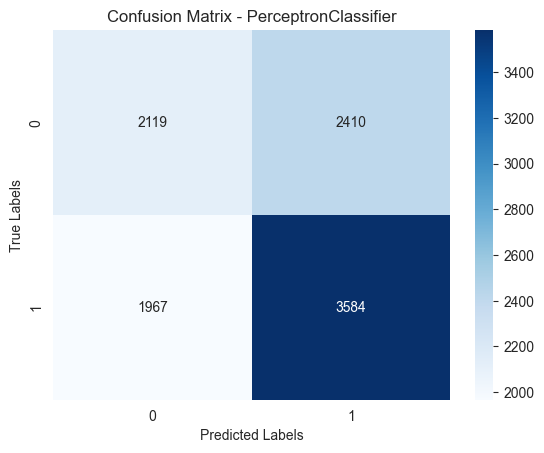


Starting 5-Fold cross-validation...
Fold 1: Accuracy = 0.5448
Fold 2: Accuracy = 0.6106
Fold 3: Accuracy = 0.4604
Fold 4: Accuracy = 0.5358
Fold 5: Accuracy = 0.6037

Cross-Validation completed.
Mean Accuracy: 0.5511


In [5]:
from src.classifiers.Perceptron_classifier import PerceptronClassifier

# Perceptron Classifier
perceptron = PerceptronClassifier()
perceptron.train_and_evaluate(X_train, y_train, X_test, y_test)

# Evaluation of the model
evaluate(perceptron, X_test, y_test)

# Perform K-Fold cross-validation with 5 folds
mean_accuracies_perceptron = cross_validate_kfold(perceptron, X_train, y_train, n_splits=5)

# Stock all accuracies
mean_accuracies.append(mean_accuracies_perceptron)

### **6. Neural Network Classifier**
A neural network classifier is trained using the MLP algorithm. This model explores hidden layer configurations to achieve optimal results.


C:\Users\Victor\Documents\Sherbrooke\Cours\IFT603 Techniques apprentissage\projet-kaggle\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Sizes: (10,), Learning Rate: 0.001, Accuracy: 0.8183531746031746
Hidden Layer Sizes: (10,), Learning Rate: 0.01, Accuracy: 0.8133928571428571
Hidden Layer Sizes: (10,), Learning Rate: 0.1, Accuracy: 0.7903769841269841


C:\Users\Victor\Documents\Sherbrooke\Cours\IFT603 Techniques apprentissage\projet-kaggle\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Sizes: (50,), Learning Rate: 0.001, Accuracy: 0.9486111111111111
Hidden Layer Sizes: (50,), Learning Rate: 0.01, Accuracy: 0.955952380952381
Hidden Layer Sizes: (50,), Learning Rate: 0.1, Accuracy: 0.937797619047619


C:\Users\Victor\Documents\Sherbrooke\Cours\IFT603 Techniques apprentissage\projet-kaggle\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Sizes: (100,), Learning Rate: 0.001, Accuracy: 0.9715277777777778
Hidden Layer Sizes: (100,), Learning Rate: 0.01, Accuracy: 0.970734126984127
Hidden Layer Sizes: (100,), Learning Rate: 0.1, Accuracy: 0.9470238095238095

Best hyperparameters found:
Hidden Layer Sizes: (100,), Learning Rate: 0.001, Accuracy: 0.9715277777777778

Evaluating model on the test set...

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4529
           1       0.97      0.98      0.97      5551

    accuracy                           0.97     10080
   macro avg       0.97      0.97      0.97     10080
weighted avg       0.97      0.97      0.97     10080



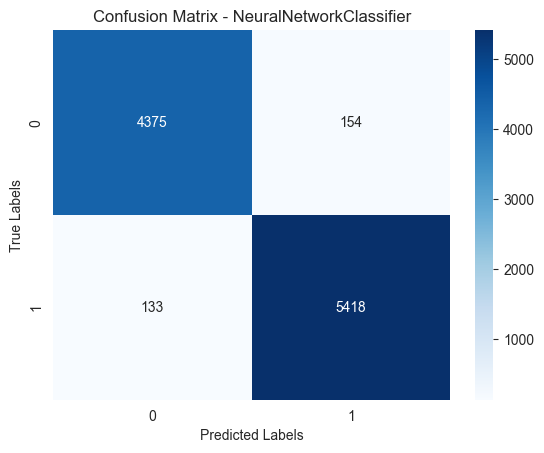


Starting 5-Fold cross-validation...


C:\Users\Victor\Documents\Sherbrooke\Cours\IFT603 Techniques apprentissage\projet-kaggle\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1: Accuracy = 0.9707


C:\Users\Victor\Documents\Sherbrooke\Cours\IFT603 Techniques apprentissage\projet-kaggle\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2: Accuracy = 0.9676


C:\Users\Victor\Documents\Sherbrooke\Cours\IFT603 Techniques apprentissage\projet-kaggle\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3: Accuracy = 0.9707


C:\Users\Victor\Documents\Sherbrooke\Cours\IFT603 Techniques apprentissage\projet-kaggle\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4: Accuracy = 0.9774
Fold 5: Accuracy = 0.9707

Cross-Validation completed.
Mean Accuracy: 0.9715


C:\Users\Victor\Documents\Sherbrooke\Cours\IFT603 Techniques apprentissage\projet-kaggle\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
from src.classifiers.NeuralNetworks_classifier import NeuralNetworkClassifier

# Neural Network Classifier
neural_network = NeuralNetworkClassifier()
neural_network.train_and_evaluate(X_train, y_train, X_test, y_test)

# Evaluation of the model
evaluate(neural_network, X_test, y_test)

# Perform K-Fold cross-validation with 5 folds
mean_accuracies_neural_network = cross_validate_kfold(neural_network, X_train, y_train, n_splits=5)

# Stock all accuracies
mean_accuracies.append(mean_accuracies_neural_network)

### **7. SVM Classifier**
Finally, a support vector machine (SVM) is trained and evaluated on the dataset. This model is suited for datasets with high dimensionality.


Kernel: linear, C: 0.001, Accuracy: 0.6468253968253969
Kernel: linear, C: 0.01, Accuracy: 0.647420634920635
Kernel: linear, C: 0.1, Accuracy: 0.6478174603174603
Kernel: linear, C: 1, Accuracy: 0.6475198412698413
Kernel: linear, C: 2, Accuracy: 0.6475198412698413
Kernel: poly, C: 0.001, Accuracy: 0.5899801587301587
Kernel: poly, C: 0.01, Accuracy: 0.710218253968254
Kernel: poly, C: 0.1, Accuracy: 0.7635912698412698
Kernel: poly, C: 1, Accuracy: 0.7902777777777777
Kernel: poly, C: 2, Accuracy: 0.79375
Kernel: rbf, C: 0.001, Accuracy: 0.6228174603174603
Kernel: rbf, C: 0.01, Accuracy: 0.7307539682539682
Kernel: rbf, C: 0.1, Accuracy: 0.8337301587301588
Kernel: rbf, C: 1, Accuracy: 0.9029761904761905
Kernel: rbf, C: 2, Accuracy: 0.9196428571428571
Kernel: sigmoid, C: 0.001, Accuracy: 0.6283730158730159
Kernel: sigmoid, C: 0.01, Accuracy: 0.5735119047619047
Kernel: sigmoid, C: 0.1, Accuracy: 0.5526785714285715
Kernel: sigmoid, C: 1, Accuracy: 0.5527777777777778
Kernel: sigmoid, C: 2, Accura

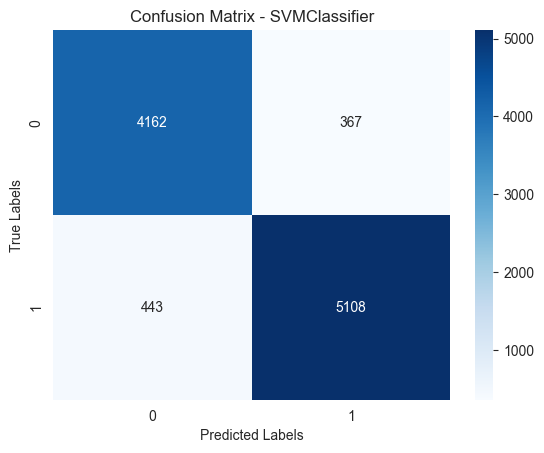


Starting 5-Fold cross-validation...
Fold 1: Accuracy = 0.9147
Fold 2: Accuracy = 0.9123
Fold 3: Accuracy = 0.9198
Fold 4: Accuracy = 0.9170
Fold 5: Accuracy = 0.9158

Cross-Validation completed.
Mean Accuracy: 0.9159


In [7]:
from src.classifiers.SVM_classifier import SVMClassifier

# SVM Classifier
svm = SVMClassifier()
svm.train_and_evaluate(X_train, y_train, X_test, y_test)

# Evaluation of the model
evaluate(svm, X_test, y_test)

# Perform K-Fold cross-validation with 5 folds
mean_accuracies_svm = cross_validate_kfold(svm, X_train, y_train, n_splits=5)

# Stock all accuracies
mean_accuracies.append(mean_accuracies_svm)

## 8. Cross-Validation Results

In this section, we perform **K-Fold Cross-Validation** for each model and visualize the **average accuracies**. Cross-validation helps us assess the performance of the model by splitting the data into K subsets (or folds) and training/testing the model multiple times on different data splits.

The plot shows the **mean accuracy** for each model, and individual fold accuracies are represented as dots. The **red dots** indicate the mean accuracy for each model, while the **blue dots** represent the accuracies for each fold in the K-Fold cross-validation.

The accuracy values are plotted on the **x-axis** and the models are displayed on the **y-axis**.

['custom_tree', 'most_common_clf', 'linear_regression', 'perceptron', 'neural_network', 'svm'] [np.float64(0.9761391658496876), np.float64(0.5506611562418179), np.float64(0.6500980989981672), np.float64(0.5510565451582676), np.float64(0.971451361328152), np.float64(0.915916482477277)]


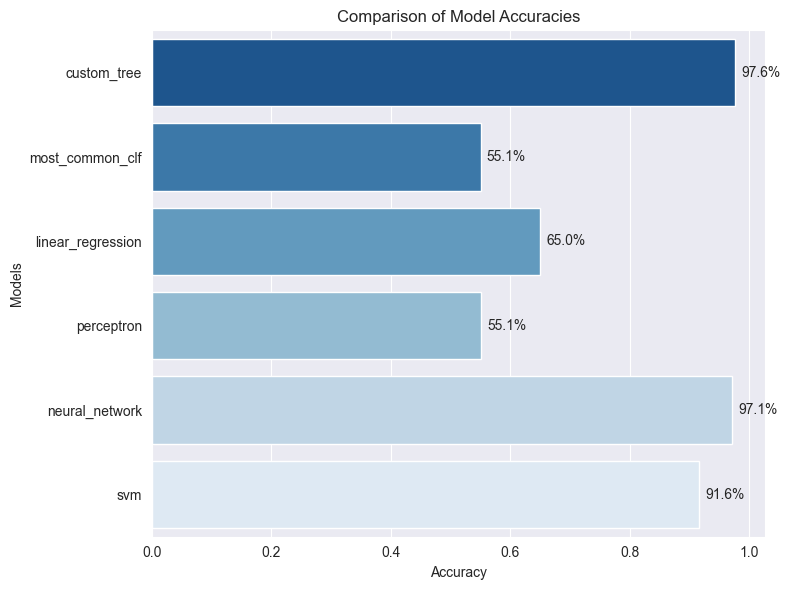

In [9]:
from src.utils.evaluation import  plot_all_accuracies

# List of our classifiers
models = ['custom_tree','most_common_clf', 'linear_regression', 'perceptron','neural_network', 'svm']

# Plot of all the average accuracies
plot_all_accuracies(models, mean_accuracies)